In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')



# Identify columns with missing values
print("Columns with missing values before handling:")
print(X.isnull().sum())


numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked'] # Assuming 'Name', 'Ticket', 'Cabin' might be excluded or handled differently

# Ensure identified features are in the DataFrame columns
numerical_features = [col for col in numerical_features if col in X.columns]
categorical_features = [col for col in categorical_features if col in X.columns]

# Create transformers for preprocessing
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


features_to_preprocess = numerical_features + categorical_features

# Select only the features to be preprocessed from X
X_subset = X[features_to_preprocess]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns not listed in transformers
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X_subset)

print("\nShape of preprocessed data:")
print(X_preprocessed.shape)

Columns with missing values before handling:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Shape of preprocessed data:
(891, 10)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 10)
Shape of X_test: (179, 10)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate an AdaBoostClassifier object
adaboost_clf = AdaBoostClassifier(random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = adaboost_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the calculated evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7989
Precision: 0.7879
Recall: 0.7027
F1-score: 0.7429


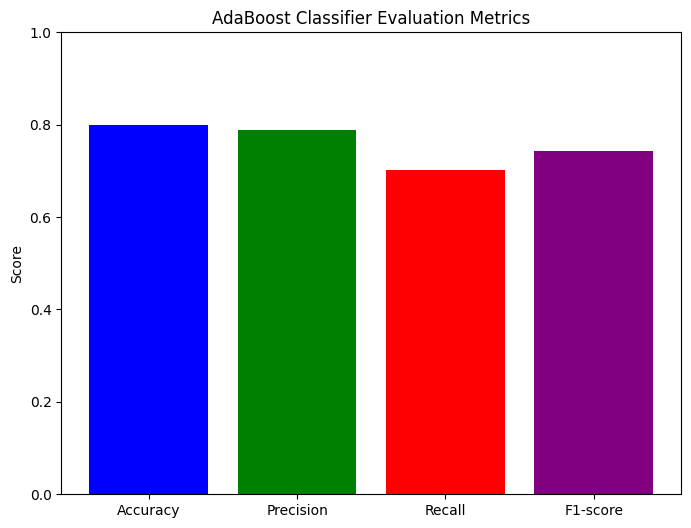

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1) # Set y-axis limit between 0 and 1
plt.ylabel('Score')
plt.title('AdaBoost Classifier Evaluation Metrics')
plt.show()